Words: Milk and Coffeee

In [33]:
import os
import tensorflow as tf
import numpy as np
import time

In [2]:
new_saved = ["milk", "coffee"]

In [3]:
# Function for processing data
def process_train_data(X, y, directory, new_saved):
    for label in new_saved:
        print(label)
        dir = os.path.join(directory, label)
        for file in os.listdir(dir):
            arr = np.load(os.path.join(directory, label, file))
            
            for frame in arr:
                if len(X) == 0:
                    X = np.array([frame])
                    y = np.array([new_saved.index(label)])
                else:
                    X = np.append(X, np.array([frame]), axis=0)
                    y = np.append(y, np.array([new_saved.index(label)]), axis=0)
            

    print(X.shape, y.shape)
    return (X, y)

In [4]:
# Function for processing data
def process_val_data(X_val,y_val, X_test, y_test, directory, new_saved):
    val = False
    for label in new_saved:
        print(label)
        dir = os.path.join(directory, label)
        for file in os.listdir(dir):
            val = not(val)
            print(val)
            arr = np.load(os.path.join(directory, label, file))
            if val:
                for frame in arr:
                    if len(X_val) == 0:
                        X_val = np.array([frame])
                        y_val = np.array([new_saved.index(label)])
                    else:
                        X_val = np.append(X_val, np.array([frame]), axis=0)
                        y_val = np.append(y_val, np.array([new_saved.index(label)]), axis=0)
            else:
                for frame in arr:
                    if len(X_test) == 0:
                        X_test = np.array([frame])
                        y_test = np.array([new_saved.index(label)])
                    else:
                        X_test = np.append(X_test, np.array([frame]), axis=0)
                        y_test = np.append(y_test, np.array([new_saved.index(label)]), axis=0)

    print(X_val.shape, y_val.shape, X_test.shape, y_test.shape)
    return (X_val, y_val, X_test, y_test)

In [5]:
train_dir = "/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_training_data"
X_train = np.array([])
y_train = np.array([])
X_train, y_train = process_train_data(X_train, y_train, train_dir, new_saved)

milk
coffee
(1381, 256, 256, 3) (1381,)


In [6]:
val_dir = "/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_validation_data"
X_val = np.array([])
y_val = np.array([])
X_test = np.array([])
y_test = np.array([])
X_val, y_val, X_test, y_test = process_val_data(X_val, y_val, X_test, y_test, val_dir, new_saved)

milk
True
False
True
False
True
False
True
coffee
False
True
False
True
False
True
(224, 256, 256, 3) (224,) (154, 256, 256, 3) (154,)


In [7]:
#shuffle train data
import sklearn
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_train, y_train

(array([[[[-0.33333334, -0.12941177,  0.00392157],
          [-0.3254902 , -0.12156863,  0.01176471],
          [-0.30980393, -0.12156863,  0.01176471],
          ...,
          [ 0.42745098,  0.38039216,  0.28627452],
          [ 0.42745098,  0.38039216,  0.28627452],
          [ 0.42745098,  0.38039216,  0.28627452]],
 
         [[-0.3254902 , -0.12156863,  0.01176471],
          [-0.31764707, -0.11372549,  0.01960784],
          [-0.3019608 , -0.11372549,  0.01960784],
          ...,
          [ 0.43529412,  0.3882353 ,  0.29411766],
          [ 0.42745098,  0.38039216,  0.28627452],
          [ 0.42745098,  0.38039216,  0.28627452]],
 
         [[-0.3254902 , -0.12941177,  0.01960784],
          [-0.31764707, -0.12156863,  0.02745098],
          [-0.31764707, -0.12156863,  0.02745098],
          ...,
          [ 0.44313726,  0.39607844,  0.3019608 ],
          [ 0.42745098,  0.38039216,  0.28627452],
          [ 0.42745098,  0.38039216,  0.28627452]],
 
         ...,
 
         [[-

In [8]:
#shuffle val and test data
import sklearn
from sklearn.utils import shuffle
X_val, y_val = shuffle(X_val, y_val, random_state=42)

X_test, y_test = shuffle(X_test, y_test, random_state=42)
X_test, y_test

(array([[[[ 0.28627452,  0.42745098, -0.2627451 ],
          [ 0.29411766,  0.43529412, -0.25490198],
          [ 0.29411766,  0.43529412, -0.25490198],
          ...,
          [ 0.29411766,  0.43529412, -0.25490198],
          [ 0.29411766,  0.43529412, -0.25490198],
          [ 0.29411766,  0.43529412, -0.25490198]],
 
         [[ 0.3254902 ,  0.45882353, -0.23137255],
          [ 0.33333334,  0.4745098 , -0.21568628],
          [ 0.33333334,  0.4745098 , -0.21568628],
          ...,
          [ 0.33333334,  0.4745098 , -0.21568628],
          [ 0.33333334,  0.4745098 , -0.21568628],
          [ 0.33333334,  0.4745098 , -0.21568628]],
 
         [[ 0.31764707,  0.45882353, -0.23137255],
          [ 0.3254902 ,  0.46666667, -0.22352941],
          [ 0.3254902 ,  0.46666667, -0.22352941],
          ...,
          [ 0.3254902 ,  0.46666667, -0.22352941],
          [ 0.3254902 ,  0.46666667, -0.22352941],
          [ 0.3254902 ,  0.46666667, -0.22352941]],
 
         ...,
 
         [[ 

In [40]:
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

base_model = ResNet50(input_shape=(256, 256,3), include_top=False, weights="imagenet")

base_model = Sequential()
base_model.add(ResNet50(input_shape=(256, 256,3),include_top=False, weights='imagenet', pooling='max'))
for layer in base_model.layers:
    layer.trainable = False
base_model.add(Dense(50, activation='relu'))
base_model.add(Dense(100, activation='relu'))
base_model.add(Dense(2, activation='softmax'))

In [41]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_models/ResNet_two_var_weights.{epoch:02d}-{val_accuracy:.2f}",
    monitor='val_accuracy',
    verbose=0,
    save_best_only=True,
    save_weights_only=False,
    mode='auto',
    save_freq='epoch',
)

In [44]:
base_model.compile(optimizer = "adam", loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [45]:
start = time.time()
resnet_history = base_model.fit(X_train, y_train, validation_data =(X_val, y_val),epochs = 30, batch_size=50, callbacks=[checkpoint])
end = time.time()
deltaTrain = end - start
print("TIME: ", deltaTrain)

Epoch 1/30


2023-02-14 18:53:44.523076: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


28/28 [==============================] - ETA: 0s - loss: 0.7006 - accuracy: 0.7422

2023-02-14 18:54:07.256734: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



28/28 [==============================] - 28s 920ms/step - loss: 0.7006 - accuracy: 0.7422 - val_loss: 0.7014 - val_accuracy: 0.5848


INFO:tensorflow:Assets written to: /Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_models/ResNet_two_var_weights.01-0.58/assets


INFO:tensorflow:Assets written to: /Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_models/ResNet_two_var_weights.01-0.58/assets


Epoch 2/30
28/28 [==============================] - 25s 898ms/step - loss: 0.2641 - accuracy: 0.8892 - val_loss: 0.7172 - val_accuracy: 0.4777
Epoch 3/30
28/28 [==============================] - 24s 874ms/step - loss: 0.1724 - accuracy: 0.9341 - val_loss: 0.6989 - val_accuracy: 0.6161


INFO:tensorflow:Assets written to: /Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_models/ResNet_two_var_weights.03-0.62/assets


INFO:tensorflow:Assets written to: /Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_models/ResNet_two_var_weights.03-0.62/assets


Epoch 4/30
28/28 [==============================] - 25s 883ms/step - loss: 0.0977 - accuracy: 0.9739 - val_loss: 0.8086 - val_accuracy: 0.5893
Epoch 5/30
28/28 [==============================] - 24s 867ms/step - loss: 0.0608 - accuracy: 0.9833 - val_loss: 0.9789 - val_accuracy: 0.5848
Epoch 6/30
28/28 [==============================] - 24s 870ms/step - loss: 0.0467 - accuracy: 0.9884 - val_loss: 1.1038 - val_accuracy: 0.5848
Epoch 7/30
28/28 [==============================] - 41s 1s/step - loss: 0.0673 - accuracy: 0.9754 - val_loss: 1.4571 - val_accuracy: 0.5848
Epoch 8/30
28/28 [==============================] - 52s 2s/step - loss: 0.0639 - accuracy: 0.9768 - val_loss: 1.2319 - val_accuracy: 0.5848
Epoch 9/30
28/28 [==============================] - 51s 2s/step - loss: 0.0207 - accuracy: 0.9957 - val_loss: 1.4151 - val_accuracy: 0.5893
Epoch 10/30
28/28 [==============================] - 50s 2s/step - loss: 0.0229 - accuracy: 0.9949 - val_loss: 1.3624 - val_accuracy: 0.5982
Epoch 11/3

INFO:tensorflow:Assets written to: /Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_models/ResNet_two_var_weights.12-0.68/assets


INFO:tensorflow:Assets written to: /Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_models/ResNet_two_var_weights.12-0.68/assets


Epoch 13/30
28/28 [==============================] - 57s 2s/step - loss: 0.0046 - accuracy: 0.9993 - val_loss: 1.8722 - val_accuracy: 0.6696
Epoch 14/30
28/28 [==============================] - 57s 2s/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 1.7373 - val_accuracy: 0.6830
Epoch 15/30
28/28 [==============================] - 55s 2s/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 1.7557 - val_accuracy: 0.6786
Epoch 16/30
28/28 [==============================] - 52s 2s/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 1.7109 - val_accuracy: 0.6830
Epoch 17/30
28/28 [==============================] - 55s 2s/step - loss: 0.0111 - accuracy: 0.9971 - val_loss: 1.2326 - val_accuracy: 0.6607
Epoch 18/30
28/28 [==============================] - 54s 2s/step - loss: 0.0051 - accuracy: 0.9993 - val_loss: 2.0707 - val_accuracy: 0.6696
Epoch 19/30
28/28 [==============================] - 54s 2s/step - loss: 0.0053 - accuracy: 0.9986 - val_loss: 1.2627 - val_accuracy: 0.6875


INFO:tensorflow:Assets written to: /Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_models/ResNet_two_var_weights.19-0.69/assets


INFO:tensorflow:Assets written to: /Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_models/ResNet_two_var_weights.19-0.69/assets


Epoch 20/30
28/28 [==============================] - 55s 2s/step - loss: 0.0030 - accuracy: 0.9993 - val_loss: 1.7105 - val_accuracy: 0.6964


INFO:tensorflow:Assets written to: /Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_models/ResNet_two_var_weights.20-0.70/assets


INFO:tensorflow:Assets written to: /Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_models/ResNet_two_var_weights.20-0.70/assets


Epoch 21/30
28/28 [==============================] - 58s 2s/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.1209 - val_accuracy: 0.6964
Epoch 22/30
28/28 [==============================] - 55s 2s/step - loss: 0.0029 - accuracy: 0.9993 - val_loss: 2.0277 - val_accuracy: 0.6741
Epoch 23/30
28/28 [==============================] - 58s 2s/step - loss: 0.0220 - accuracy: 0.9920 - val_loss: 1.0622 - val_accuracy: 0.7321


INFO:tensorflow:Assets written to: /Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_models/ResNet_two_var_weights.23-0.73/assets


INFO:tensorflow:Assets written to: /Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_models/ResNet_two_var_weights.23-0.73/assets


Epoch 24/30
28/28 [==============================] - 61s 2s/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.0261 - val_accuracy: 0.7545


INFO:tensorflow:Assets written to: /Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_models/ResNet_two_var_weights.24-0.75/assets


INFO:tensorflow:Assets written to: /Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_models/ResNet_two_var_weights.24-0.75/assets


Epoch 25/30
28/28 [==============================] - 68s 2s/step - loss: 6.8637e-04 - accuracy: 1.0000 - val_loss: 1.0002 - val_accuracy: 0.7946


INFO:tensorflow:Assets written to: /Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_models/ResNet_two_var_weights.25-0.79/assets


INFO:tensorflow:Assets written to: /Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_models/ResNet_two_var_weights.25-0.79/assets


Epoch 26/30
28/28 [==============================] - 66s 2s/step - loss: 5.9073e-04 - accuracy: 1.0000 - val_loss: 0.7956 - val_accuracy: 0.8571


INFO:tensorflow:Assets written to: /Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_models/ResNet_two_var_weights.26-0.86/assets


INFO:tensorflow:Assets written to: /Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_models/ResNet_two_var_weights.26-0.86/assets


Epoch 27/30
28/28 [==============================] - 34s 1s/step - loss: 6.4692e-04 - accuracy: 1.0000 - val_loss: 0.8601 - val_accuracy: 0.8616


INFO:tensorflow:Assets written to: /Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_models/ResNet_two_var_weights.27-0.86/assets


INFO:tensorflow:Assets written to: /Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_models/ResNet_two_var_weights.27-0.86/assets


Epoch 28/30
28/28 [==============================] - 27s 947ms/step - loss: 4.4580e-04 - accuracy: 1.0000 - val_loss: 0.8365 - val_accuracy: 0.8616
Epoch 29/30
28/28 [==============================] - 25s 904ms/step - loss: 7.8542e-04 - accuracy: 1.0000 - val_loss: 0.5230 - val_accuracy: 0.8527
Epoch 30/30
28/28 [==============================] - 24s 868ms/step - loss: 0.0058 - accuracy: 0.9978 - val_loss: 0.9025 - val_accuracy: 0.7946
TIME:  1749.1605887413025


In [39]:
base_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_5 (ModuleWrap (None, 2048)              23587712  
_________________________________________________________________
dense_10 (Dense)             (None, 50)                102450    
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 102       
Total params: 23,690,264
Trainable params: 102,552
Non-trainable params: 23,587,712
_________________________________________________________________


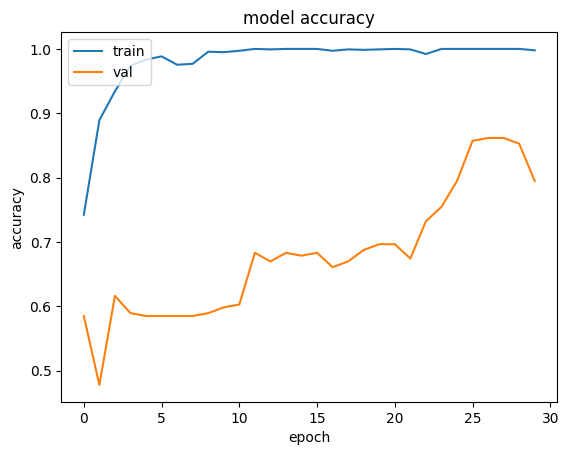

In [46]:
from matplotlib import pyplot as plt
plt.plot(resnet_history.history['accuracy'])
plt.plot(resnet_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

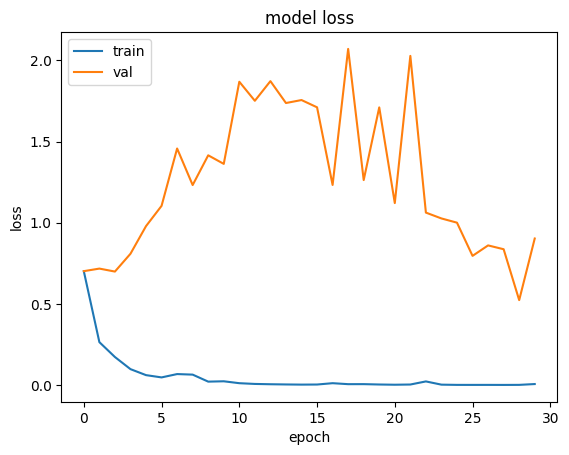

In [47]:
plt.plot(resnet_history.history['loss'])
plt.plot(resnet_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()